In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
data=pd.read_csv("C:\happiness_score_dataset.csv")

In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data_columns =['Country','Region','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)',
       'Generosity']

In [6]:
data = data[data_columns].copy()   ## Here i take what is necessary for me.


In [7]:
data.rename(columns= {'Happiness Score':'happiness_score','Happiness Rank':'happiness_rank','Economy (GDP per Capita)':'economy','Health (Life Expectancy)':'health','Trust (Government Corruption)':'Corruption'},inplace = True)

##### In Above I Seperated Unused Data.

In [8]:
data

,Country,Region,happiness_score,economy,Family,health,Freedom,Corruption,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [9]:
data.isnull().sum()    #Checking the null values here.

Country            0
Region             0
happiness_score    0
economy            0
Family             0
health             0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

Text(0, 0.5, 'GDP per capita')

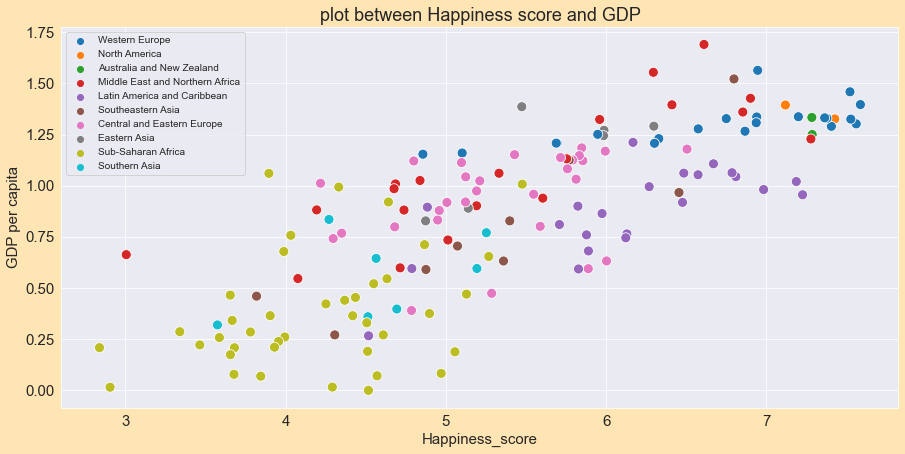

In [10]:
# Plot between happiness and GDP

plt.rcParams['figure.figsize']= (15,7)
plt.title('plot between Happiness score and GDP')
sns.scatterplot(x =data['happiness_score'], y = data['economy'] , hue = data.Region, s =100);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness_score')
plt.ylabel('GDP per capita')

#### In above Graph the Happiness score and GDP per capita i.E ECONOMY is very low in sub-Saharian region. 
#### Whereareas WESTERN EUROPE has high Happiness score and also some part of LATIN AMERICA AND CARIBBEAN.

Text(0, 0.5, 'Generosity')

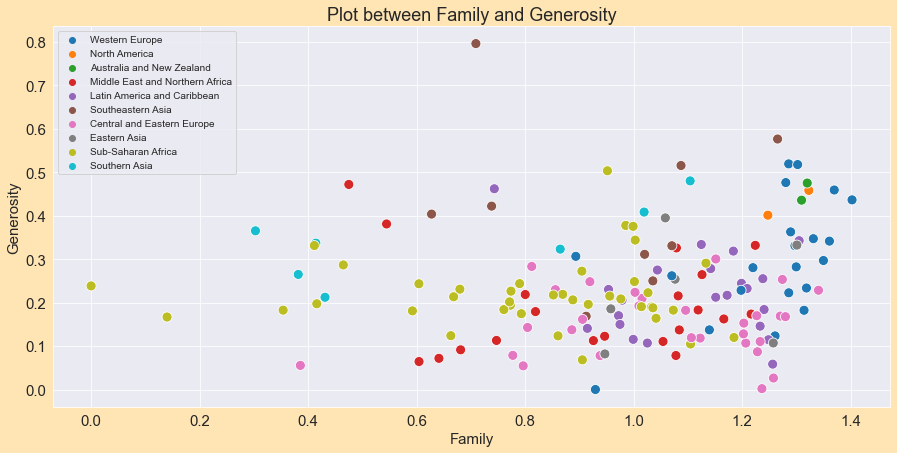

In [11]:
# Plot between happiness and GDP

plt.rcParams['figure.figsize']= (15,7)
plt.title('Plot between Family and Generosity')
sns.scatterplot(x =data.Family , y = data.Generosity , hue = data.Region, s =100);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Family')
plt.ylabel('Generosity')

In [12]:
gdp_region = data.groupby('Region')['economy'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: economy, dtype: float64

Text(0, 0.5, '')

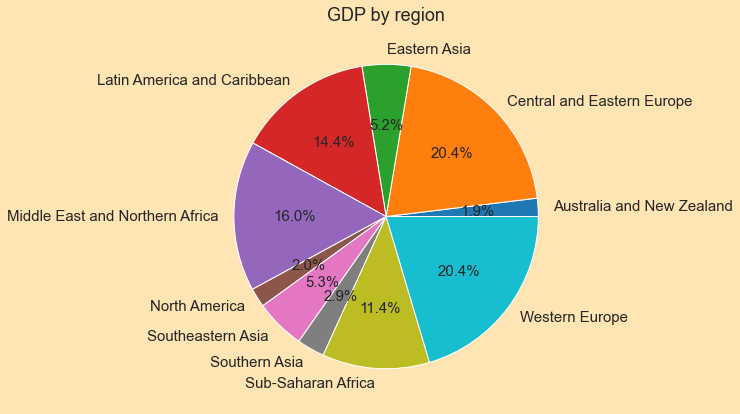

In [13]:
gdp_region.plot.pie(autopct = '%1.1f%%')   #parameter i.e autopct
plt.title('GDP by region')
plt.ylabel('')

#### The WESTERN EUROPE AND CENTRAL AND EAST EUROPE is contributing more in GDP.
#### AUSTRALIA AND NEW ZEALAND is (Contributing)having less GDP by region.

In [14]:
# part of pandas function   
# Total countries
total_country = data.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<AxesSubplot:>

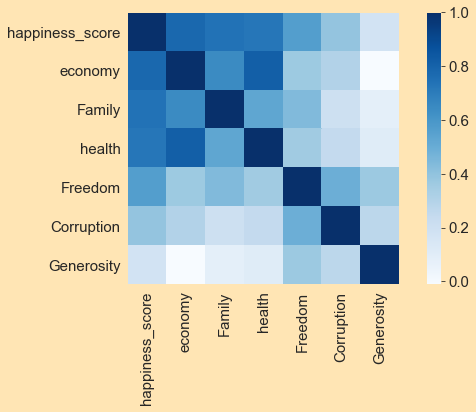

In [15]:
# correlation Map


cor =data.corr(method = "pearson")    ## I use pearson method incorrelation.
f, ax = plt.subplots(figsize =(10,5))
sns.heatmap(cor, mask =np.zeros_like(cor),    ## dtype=np.bool
           cmap="Blues", square=True, ax=ax)
    


#### The dark blue cell colour shows high correlation and light blue greyish show low correlation.

In [16]:
## going to visualise the bar plot
# Corruption in region
Tcorruption = data.groupby('Region')[['Corruption']].mean()
Tcorruption

,Corruption
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


#### Australia and New zealand has highest corruption.
#### Central and eastern Europe has least corruption.

<BarContainer object of 10 artists>

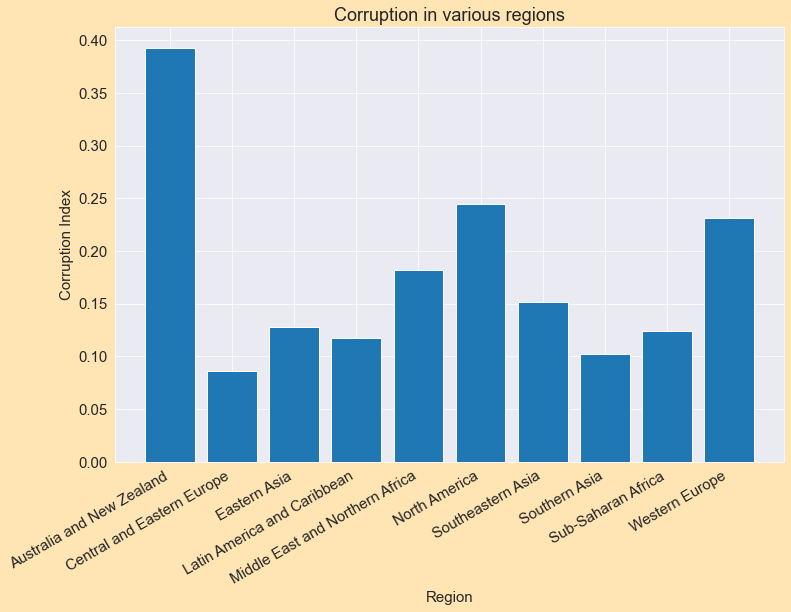

In [17]:
# Barplot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (12, 8)
plt.title('Corruption in various regions')
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Corruption Index', fontsize =15 )
plt.xticks(rotation =30 , ha='right')     ## for horizontal alignment.
plt.bar(Tcorruption.index, Tcorruption.Corruption)

In [18]:
Top_10 = data.head(10)
bottom_10 = data.tail(10)

<ipython-input-19-17edcd1e4ce8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha ='right')
<ipython-input-19-17edcd1e4ce8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha='right')


Text(599.1068181818181, 0.5, 'Life expectancy(Health)')

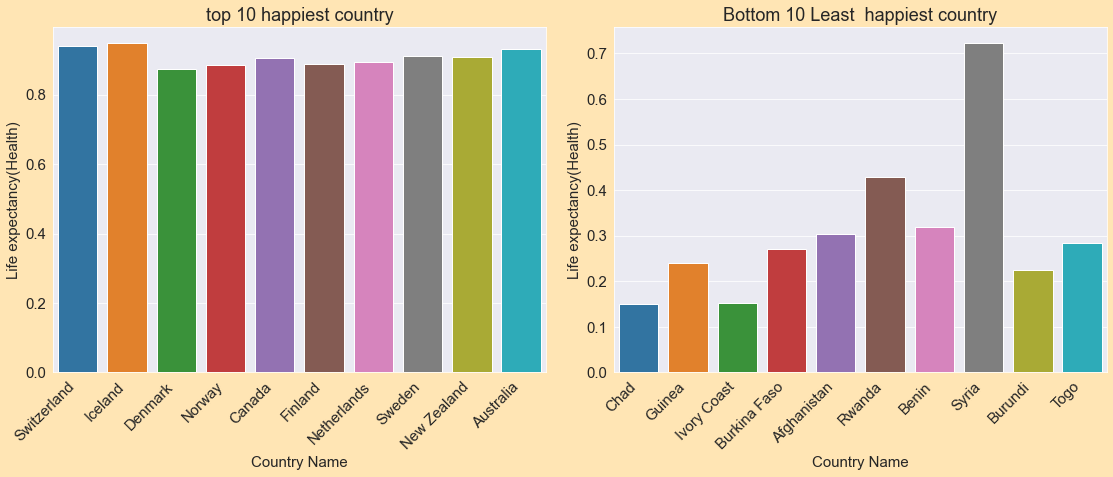

In [19]:
fig, axes= plt.subplots(1,2,  figsize= (16, 6))
plt.tight_layout(pad= 2)


xlabels = Top_10.Country
axes[0].set_title('top 10 happiest country')
axes[0].set_xticklabels(xlabels, rotation=45, ha ='right')
sns.barplot(x= Top_10.Country,y= Top_10.health,ax= axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy(Health)')

xlabels = bottom_10.Country
axes[1].set_title('Bottom 10 Least  happiest country')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x= bottom_10.Country,y= bottom_10.health,ax= axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expectancy(Health)')



In [20]:
data.head(10)

,Country,Region,happiness_score,economy,Family,health,Freedom,Corruption,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


In [21]:
data.tail(10)

,Country,Region,happiness_score,economy,Family,health,Freedom,Corruption,Generosity
148,Chad,Sub-Saharan Africa,3.667,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386
149,Guinea,Sub-Saharan Africa,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657
150,Ivory Coast,Sub-Saharan Africa,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165
151,Burkina Faso,Sub-Saharan Africa,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
152,Afghanistan,Southern Asia,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
153,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,Syria,Middle East and Northern Africa,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,Burundi,Sub-Saharan Africa,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727
157,Togo,Sub-Saharan Africa,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


Text(0, 0.5, 'Happiness score')

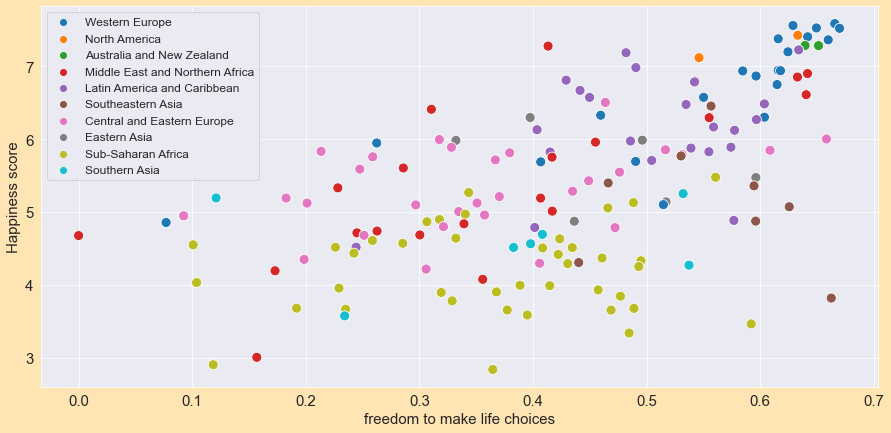

In [22]:
plt.rcParams['figure.figsize']= (15, 7)
sns.scatterplot(x =data.Freedom , y = data.happiness_score , hue = data.Region, s=100);
plt.legend(loc ='upper left', fontsize ='12')
plt.xlabel('freedom to make life choices')
plt.ylabel('Happiness score')


#### Western region has High happiness score and Freedom to make life choices.

<BarContainer object of 10 artists>

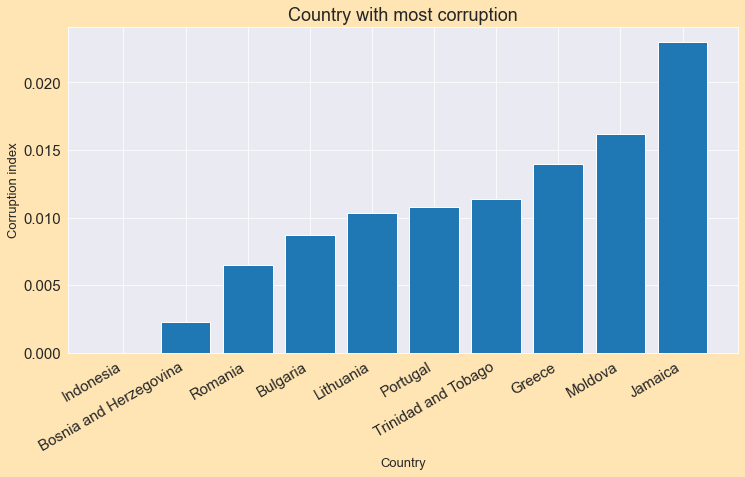

In [23]:
country = data.sort_values(by= 'Corruption').head(10)
plt.rcParams['figure.figsize']= (12,6)
plt.title('Country with most corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption index', fontsize =13)
plt.xticks(rotation =30,ha ='right')
plt.bar(country.Country, country.Corruption)

<BarContainer object of 10 artists>

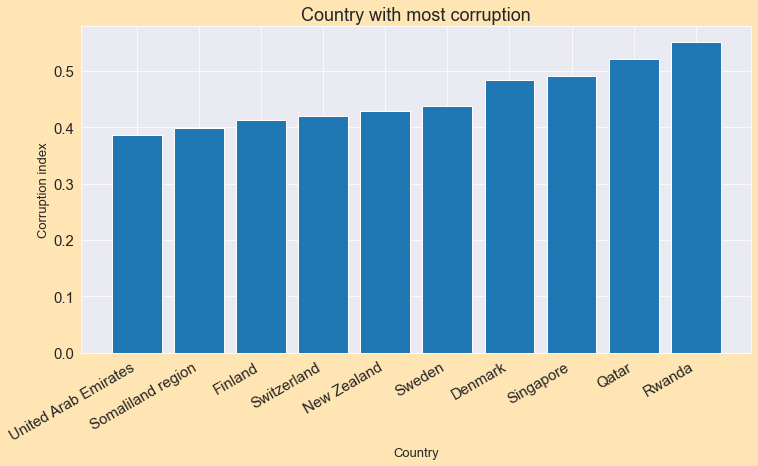

In [24]:
country = data.sort_values(by= 'Corruption').tail(10)
plt.rcParams['figure.figsize']= (12,6)
plt.title('Country with most corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption index', fontsize =13)
plt.xticks(rotation =30,ha ='right')
plt.bar(country.Country, country.Corruption)

Text(0.5, 0, 'Happiness score')

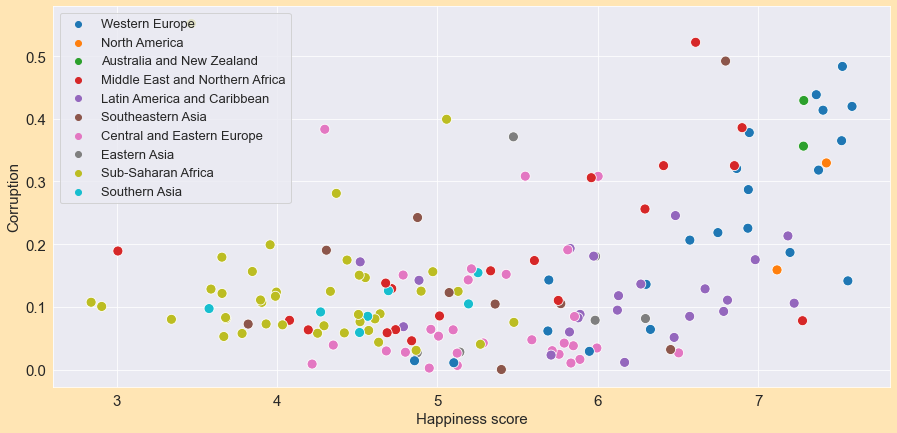

In [25]:
## Corruption V/S Happiness Score.

plt.rcParams['figure.figsize']= (15,7)
sns.scatterplot(x =data.happiness_score , y = data.Corruption , hue = data.Region, s=100);
plt.legend(loc ='upper left', fontsize ='13')
plt.ylabel('Corruption')
plt.xlabel('Happiness score')




####  1)From the above Analysis I observe that Western Europe countries like Switzerland,Denmark,Finland,norway,Swaden has Good  ####   and high Happiness Score then other Region Apart from that 2) Latin America and Caribbean region Has high happiness 
####   Score And Less
####   corruption as compare to other region in term of Generiosity also it is High.
    
####  3)Sub-Saharian Africa has low Happiness score which consist of 40 countries which is large in number They also have low
####    Freedom to make choices And corruption is also moderate.
    
####  4) In terms of correlation -Economy and Happiness score has high coorelation and Health and Economy,Health and happiness
####                                              score also has high correlation.

####   5)Generiosity and economy has low correlation and curruption and Happiness has moderate correlation. 
####   6) Western and Eastern Region Contribute more in GDP i.e(20.4%) Whereas Australia and New Zeland contribute  ####less(Economy).It contain 2 countries with Highest corruption Rate.


